<a href="https://colab.research.google.com/github/Sritam33/Machine-learning/blob/main/Global_super_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd



In [ ]:
! pip install xlrd

In [ ]:
df = pd.read_excel("/content/converted_data.xlsx")

In [ ]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.shape

(51290, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      51290 non-null  int64         
 1   Row ID          51290 non-null  int64         
 2   Order ID        51290 non-null  object        
 3   Order Date      51290 non-null  datetime64[ns]
 4   Ship Date       51290 non-null  datetime64[ns]
 5   Ship Mode       51290 non-null  object        
 6   Customer ID     51290 non-null  object        
 7   Customer Name   51290 non-null  object        
 8   Segment         51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Postal Code     9994 non-null   float64       
 13  Market          51290 non-null  object        
 14  Region          51290 non-null  object        
 15  Pr

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
df.drop(["Unnamed: 0","Row ID","Postal Code","Discount"],axis=1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Pr

In [ ]:
# find categorical value
categorical = [var for var in df.columns if df[var].dtype == "O"]
print ("there are {} categorical variables".format(len(categorical)))
print("the categorical variables are:",categorical)

there are 15 categorical variables
the categorical variables are: ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority']


In [ ]:
df[categorical].head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


In [ ]:
df[categorical].isnull().sum()

Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Sales,Quantity,Profit,Shipping Cost
Sales,1.000000,0.313577,0.484918,0.768073
Quantity,0.313577,1.000000,0.104365,0.272649
Profit,0.484918,0.104365,1.000000,0.354441
Shipping Cost,0.768073,0.272649,0.354441,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Pr

# extracting date time and weekdays and weekend

In [ ]:
df['Order_day'] = df['Order Date'].dt.day
df['Order_month'] = df['Order Date'].dt.month


df['day_num_order'] = df['Order Date'].dt.dayofweek

def classify_day(day_num):
    if day_num<5:
        return 'weekday'
    else:
        return 'holiday'

df['Day type'] = df['day_num_order'].apply(classify_day)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Pr

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product Name,Sales,Quantity,Profit,Shipping Cost,Order Priority,Order_day,Order_month,day_num_order,Day type
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,762.1845,933.57,Critical,31,7,1,weekday
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,"Novimex Executive Leather Armchair, Black",3709.395,9,-288.7650,923.63,Critical,5,2,1,weekday
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,"Nokia Smart Phone, with Caller ID",5175.171,9,919.9710,915.49,Medium,17,10,3,weekday
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,"Motorola Smart Phone, Cordless",2892.510,5,-96.5400,910.16,Medium,28,1,0,weekday
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,"Sharp Wireless Fax, High-Speed",2832.960,8,311.5200,903.04,Critical,5,11,1,weekday


In [ ]:
df =df.drop(['Product ID','Ship Date','Order Date','day_num_order','Customer ID','Order ID'],axis=1)

In [ ]:
df.drop(['Customer Name'],axis=1,inplace=True)

In [ ]:
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Shipping Cost,Order Priority,Order_day,Order_month,Day type
0,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,762.1845,933.57,Critical,31,7,weekday
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,-288.7650,923.63,Critical,5,2,weekday
2,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,919.9710,915.49,Medium,17,10,weekday
3,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,-96.5400,910.16,Medium,28,1,weekday
4,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,311.5200,903.04,Critical,5,11,weekday


In [ ]:
num_df = df.select_dtypes(include='number')
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          51290 non-null  float64
 1   Quantity       51290 non-null  int64  
 2   Profit         51290 non-null  float64
 3   Shipping Cost  51290 non-null  float64
 4   Order_day      51290 non-null  int32  
 5   Order_month    51290 non-null  int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 2.0 MB


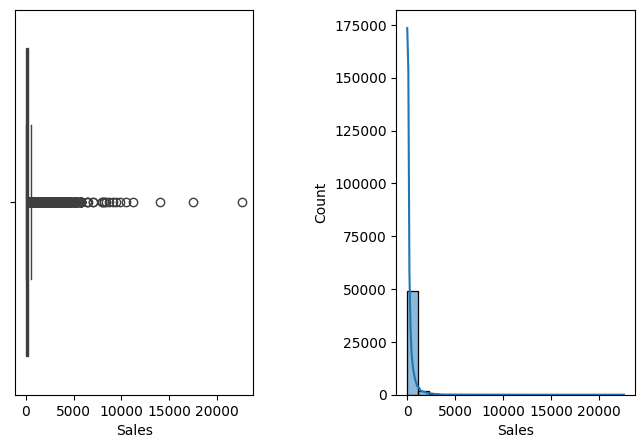

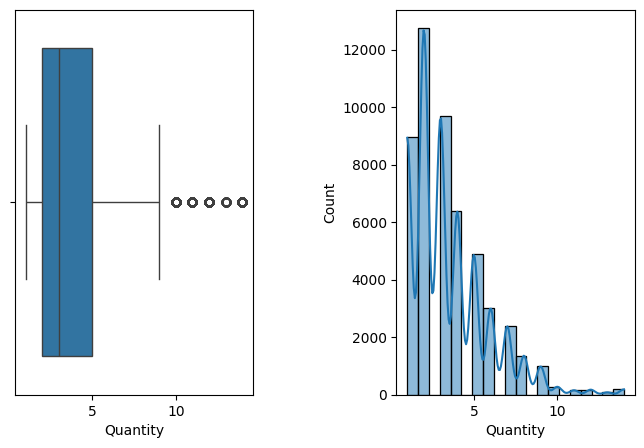

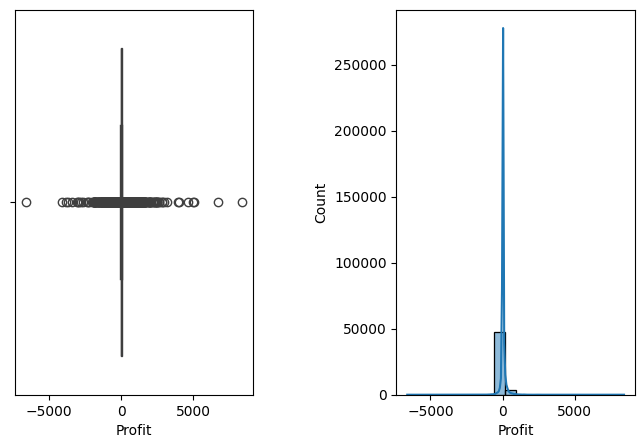

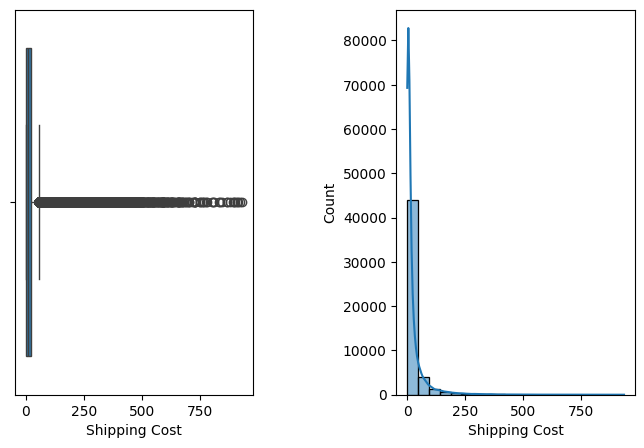

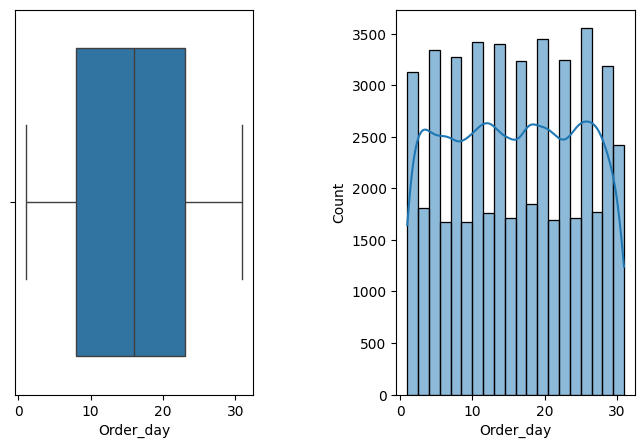

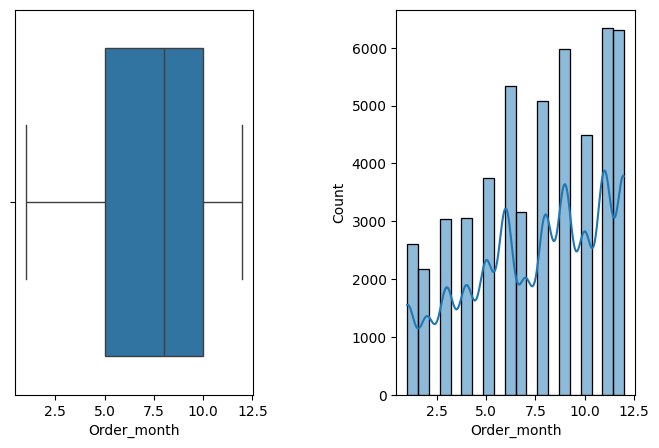

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_visual(col):
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
    sns.boxplot(x=col,data=num_df,ax=ax[0])
    sns.histplot(x=col,data = num_df,kde=True,bins=20,ax=ax[1])
    plt.subplots_adjust(wspace=0.6)

for col in num_df.columns:
    draw_visual(col)

In [ ]:
df.isnull().sum()

Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
Order_day         0
Order_month       0
Day type          0
dtype: int64

In [ ]:
df['Sales'] = np.log(df['Sales'])
df['Quantity'] = np.log(df['Quantity'])
df['Shipping Cost'] = np.log(df['Shipping Cost'])

In [ ]:
df.isnull().sum()

Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
Order_day         0
Order_month       0
Day type          0
dtype: int64

# removing outliers from numerical col

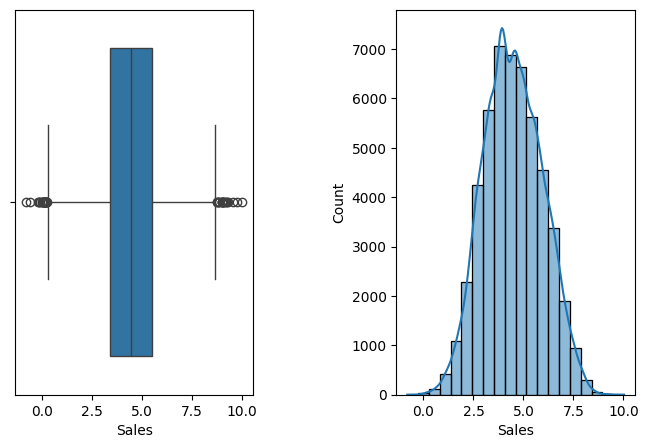

In [ ]:
# def draw_visual(col):
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='Sales',data=df,ax=ax[0])
sns.histplot(x='Sales',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)

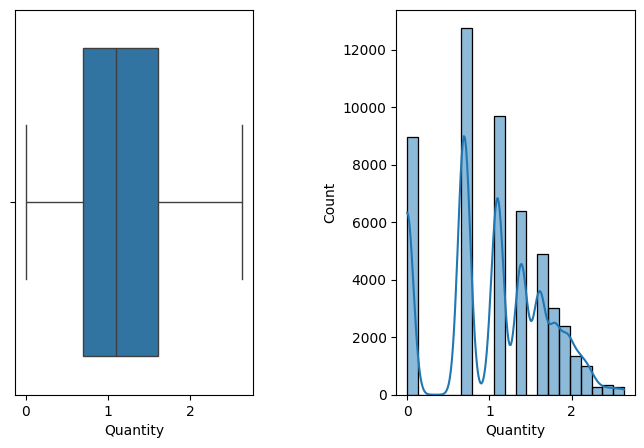

In [ ]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='Quantity',data=df,ax=ax[0])
sns.histplot(x='Quantity',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)

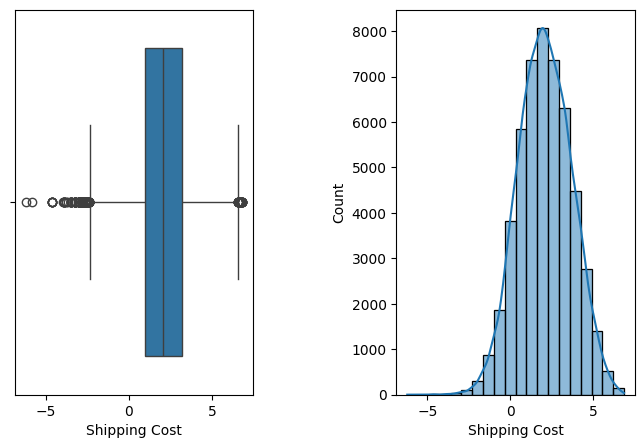

In [ ]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='Shipping Cost',data=df,ax=ax[0])
sns.histplot(x='Shipping Cost',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)

In [ ]:
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['Sales'] < lower_fence) | (df['Sales'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

df = df[(df['Sales'] >=lower_fence) & (df['Sales'] <= upper_fence)]

Outliers are values less than 0.28 or greater than 8.67
Number of outliers: 47


In [ ]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['Quantity'] < lower_fence) | (df['Quantity'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

df = df[(df['Quantity'] >=lower_fence) & (df['Quantity'] <= upper_fence)]

Outliers are values less than -0.68 or greater than 2.98
Number of outliers: 0


In [ ]:
q1 = df['Shipping Cost'].quantile(0.25)
q3 = df['Shipping Cost'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['Shipping Cost'] < lower_fence) | (df['Shipping Cost'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

df = df[(df['Shipping Cost'] >=lower_fence) & (df['Shipping Cost'] <= upper_fence)]

Outliers are values less than -2.39 or greater than 6.55
Number of outliers: 145


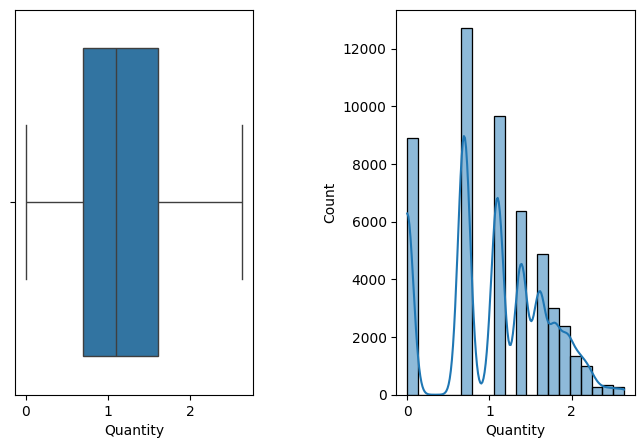

In [ ]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='Quantity',data=df,ax=ax[0])
sns.histplot(x='Quantity',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)

In [ ]:
df.isnull().sum()

Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
Order_day         0
Order_month       0
Day type          0
dtype: int64

#
analyze the profits of the superstore sales dataset across different months, weekdays, and weekends, and to understand the impact of outliers

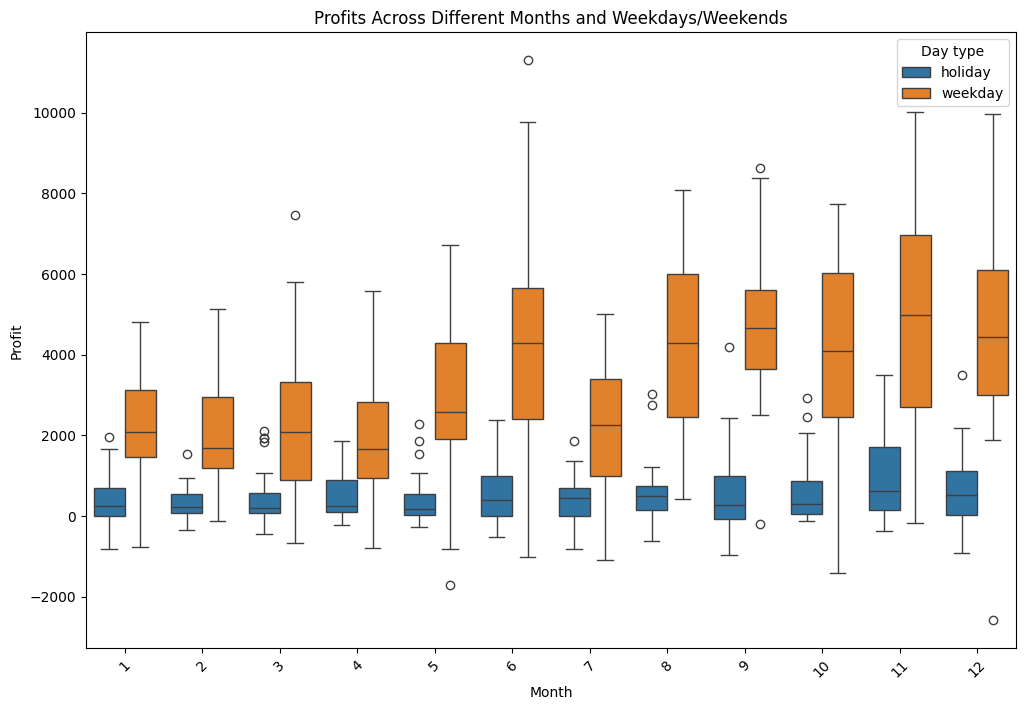

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming you have loaded the dataset into a DataFrame called 'superstore_data'
# and it contains columns 'Profit', 'Month', 'Weekday', and 'Weekend'

# Group the data by month, weekday, and weekend
profit_grouped = df.groupby(['Order_month', 'Order_day', 'Day type'])['Profit'].sum().reset_index()

# Create box plots to visualize profits across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Order_month', y='Profit', hue='Day type', data=profit_grouped)
plt.title('Profits Across Different Months and Weekdays/Weekends')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# Check outliers of profit column

In [ ]:
cat_df = df.select_dtypes(include=['object'])

In [ ]:
cat_df.head(2)

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority,Day type
32,Same Day,Consumer,Amarillo,Texas,United States,US,Central,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,High,weekday
33,Second Class,Corporate,Gold Coast,Queensland,Australia,APAC,Oceania,Office Supplies,Appliances,"Breville Stove, Red",Critical,weekday


# Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in cat_df.columns:
    df[col] = label.fit_transform(df[col])

In [ ]:
df.head(3)

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Shipping Cost,Order Priority,Order_day,Order_month,Day type
32,1,0,91,981,139,6,3,0,5,1639,7.805242,1.609438,-350.4900,6.537300,1,15,10,1
33,2,1,1202,819,6,0,9,1,1,732,7.834760,1.609438,561.4800,6.536402,0,3,11,1
34,2,0,1119,192,139,6,12,0,16,714,8.191698,2.484907,135.4068,6.526671,1,12,12,1


In [ ]:
df.corr()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Shipping Cost,Order Priority,Order_day,Order_month,Day type
Ship Mode,1.000000,0.006457,-0.001480,0.009054,-0.009130,-0.003704,-0.001842,-0.000369,0.004200,0.006746,0.003917,0.004822,0.003494,-0.166674,0.404679,0.002498,0.004053,-0.003981
Segment,0.006457,1.000000,0.001600,-0.000671,0.006121,-0.003301,-0.010562,-0.001768,0.010388,0.005809,-0.000229,-0.001904,0.004411,-0.002362,0.014002,0.004086,-0.011517,-0.004668
City,-0.001480,0.001600,1.000000,0.231900,0.003660,0.088231,0.085784,-0.002690,-0.000773,0.001411,0.013784,0.033929,0.022756,0.010232,0.010167,0.000260,0.004754,-0.024226
State,0.009054,-0.000671,0.231900,1.000000,-0.112645,-0.029748,-0.002446,-0.002572,0.010148,0.005371,0.027855,0.058904,0.009930,0.021921,0.014822,-0.005838,-0.019768,-0.008477
Country,-0.009130,0.006121,0.003660,-0.112645,1.000000,0.418367,0.143798,-0.007622,0.004427,0.029381,-0.148359,-0.015605,-0.066256,-0.135047,0.001335,-0.011736,0.021499,-0.006089
Market,-0.003704,-0.003301,0.088231,-0.029748,0.418367,1.000000,0.055099,-0.023829,-0.006062,0.022293,-0.101269,0.114695,-0.023437,-0.092389,-0.000482,-0.004716,0.056492,-0.012833
Region,-0.001842,-0.010562,0.085784,-0.002446,0.143798,0.055099,1.000000,-0.026694,0.017819,0.009613,0.053935,0.179025,0.002347,0.048713,-0.002700,0.005042,0.021259,-0.011588
Category,-0.000369,-0.001768,-0.002690,-0.002572,-0.007622,-0.023829,-0.026694,1.000000,0.014270,0.001987,0.045393,-0.013330,0.067541,0.042774,-0.006511,-0.007795,-0.005496,0.007898
Sub-Category,0.004200,0.010388,-0.000773,0.010148,0.004427,-0.006062,0.017819,0.014270,1.000000,0.128676,0.047351,0.004993,-0.041975,0.039655,0.003593,0.012756,-0.003101,0.000782
Product Name,0.006746,0.005809,0.001411,0.005371,0.029381,0.022293,0.009613,0.001987,0.128676,1.000000,0.028163,0.001367,0.007751,0.024850,0.001157,0.008426,-0.000639,-0.000820


In [ ]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['Profit'] < lower_fence) | (df['Profit'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)
#
df = df[(df['Profit'] >=lower_fence) & (df['Profit'] <= upper_fence)]

Outliers are values less than -55.22 or greater than 92.03
Number of outliers: 9707


# spliting

In [ ]:
X = df.drop(columns=['Profit'])
y = df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(33112, 17)

# Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# training the model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

# test the model

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
lin_reg.score(X_test,y_test)

0.2315924213437096

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.2315924213437096
MAE 16.138271749630533
MSE 535.8680675996092


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Instantiate the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=5,random_state=42)
# Train the model on the training data
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Predict on the test set
y_pred = regressor.predict(X_test)


In [ ]:
# training  the model accuracy

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred_train = regressor.predict(X_train)

0.3167371933889166

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 484.6421245407083
R-squared: 0.3050478206299494


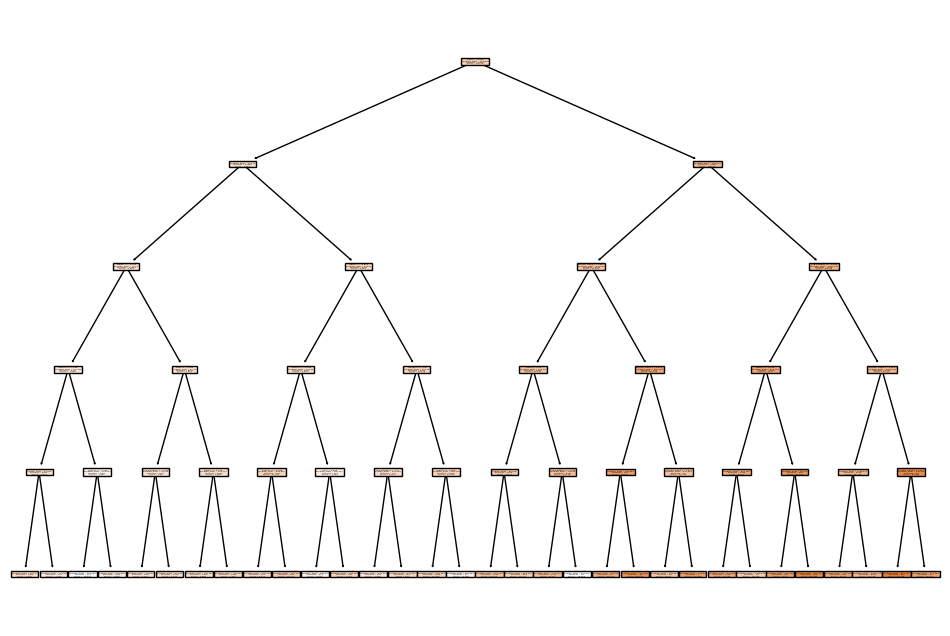

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()


# RandomForestRegressor

In [ ]:
# import random forest Regressor
from sklearn.ensemble import RandomForestRegressor
# instantiate the Regressor
rfr = RandomForestRegressor(n_estimators = 100,random_state =1)
# fit the model
rfr.fit(X_train,y_train)


RandomForestRegressor(random_state=1)

In [ ]:
# predict test set results
y_pred = rfr.predict(X_test)

In [ ]:
y_pred_train = rfr.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_train)

0.927306834153854

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_pred,y_test))

R2 score 0.4830488251977434
MAE 12.453122669114626
MSE 360.50871279673225


In [ ]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score( rfr,X_train, y_train, cv = 5, scoring='r2')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.46244971 0.4727003  0.47248355 0.47470571 0.45391487]


# XGBRegressor

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 345.9039958696392


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 12.476481082127632


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 18.598494451692567


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.5039912471285335
